In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)


<ipython-input-2-1570110eca21>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
university_df = pd.read_pickle(DATA_DIR/ 'university_ranking_rpp.pickle')

In [4]:
university_df[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,RPP_goods,RPP_rents,RPP_other
0,1.0,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,100.00,2015.0,166027,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25,1,Lawrence S. Bacow,President,6174951000,42103580,082359691|149617367|047006379,215500,1,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2,1,2,9,1,1,11,1,2,2,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,14,6,17,15,15,15,2,5,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2505,-71.118313,42.374471,96,1,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3
1,2.0,Stanford University,USA,2.0,9.0,2.0,4.0,5.0,3.0,3.0,4.0,10.0,98.66,2015.0,243744,Stanford University,,,Stanford,CA,94305,6,8,Marc Tessier-Lavigne,President,6507232300,941156365,009214214,130500,1,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2,1,2,9,1,1,11,1,2,1,1,2,21,1,A,-2,-2,-2,1,1,1,1,1,2,15,11,14,14,6,17,15,15,15,2,4,2,-2,-2,41940,1,488,-2,6085,Santa Clara County,618,-122.167359,37.429434,96,1,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,109.1,224.0,110.3
2,3.0,Massachusetts Institute of Technology,USA,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,97.54,2015.0,166683,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25,1,L. Rafael Reif,President,6172531000,42103594,001425594,217800,1,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,14,15,14,6,17,15,15,15,1,4,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2507,-71.093226,42.359243,96,1,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3


In [5]:
salary_df = pd.read_pickle(DATA_DIR / 'postdoc_salary_df_inflation_adjusted.pickle')

In [6]:
len(salary_df)

34804

In [7]:
salary_df[:3]

,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,CASE_SUBMITTED,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PUBLIC_DISCLOSURE,CASE_DATE,dataset,BASE_SALARY,SOC_NAME,EMPLOYMENT_START_DATE,RECEIVED_DATE,BEGIN_DATE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_JOB_TITLE,WAGE_RATE_OF_PAY,INFLACTION_SCALED_BASE_SALARY,INFLATION_SCALED_BASE_SALARY
48938,POSTDOCTORAL RESEARCHER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-04-19 12:23:24,2019-08-15 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,68978.5,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-04-19 12:23:24,2020Q4,68978.5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,68978.5,71683.249058
49510,POSTDOCTORAL FELLOW RESEARCH ASSOCIATE,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-06-18 09:09:18,2019-08-01 00:00:00,TEMPLE UNIVERSITY--A COMMONWEALTH UNIVERSITY,TEMPLE UNIVERSITY,PHILADELPHIA,PA,19122,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19122,60000.0,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-06-18 09:09:18,2020Q4,60000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,60000.0,62352.688787
77188,POSTDOCTORAL RESEARCH ASSOCIATE,"COMPUTER PROGRAMMERS, R&D",Y,2019-03-15 09:05:46,2019-06-01 00:00:00,RENSSELAER POLYTECHNIC INSTITUTE,NaN,TROY,NY,12180,UNITED STATES OF AMERICA,Troy,Rensselaer,NEW YORK,12180,50000.0,NaN,Year,46883.0,Year,Level I,PLACE OF BUSINESS,2019-03-15 09:05:46,2020Q4,50000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,50000.0,51960.573989


In [8]:
salary_df[salary_df.EMPLOYER_NAME.values=="RESEARCH FOUNDATION OF THE STATE UNIVERSITY OF NEW YORK"]#.EMPLOYER_CITY.unique()

,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,CASE_SUBMITTED,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PUBLIC_DISCLOSURE,CASE_DATE,dataset,BASE_SALARY,SOC_NAME,EMPLOYMENT_START_DATE,RECEIVED_DATE,BEGIN_DATE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_JOB_TITLE,WAGE_RATE_OF_PAY,INFLACTION_SCALED_BASE_SALARY,INFLATION_SCALED_BASE_SALARY
538763,POSTDOCTORAL ASSOCIATE,BIOMEDICAL ENGINEERS,Y,2017-12-29 00:00:00,2018-03-01 00:00:00,RESEARCH FOUNDATION OF THE STATE UNIVERSITY OF...,NaN,STONY BROOK,NY,11794,NaN,STONY BROOK,SUFFOLK,NY,11794-5281,51400.0,NaN,Year,NaN,NaN,NaN,NaN,2017-12-29 00:00:00,2020Q4,51400.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,53278.084657,55367.197196
589707,SENIOR POSTDOCTORAL ASSOCIATE,SOIL AND PLANT SCIENTISTS,Y,2019-06-25 12:41:12,2019-08-28 00:00:00,RESEARCH FOUNDATION OF THE STATE UNIVERSITY OF...,NaN,STONY BROOK,NY,11794,UNITED STATES OF AMERICA,Stony Brook,Suffolk,NEW YORK,11794,60000.0,NaN,Year,48214.0,Year,Level II,PLACE OF BUSINESS,2019-06-25 12:41:12,2020Q4,60000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,60000.000000,62352.688787
590054,SENIOR POSTDOCTORAL ASSOCIATE,SOIL AND PLANT SCIENTISTS,Y,2019-06-25 17:41:28,2019-08-28 00:00:00,RESEARCH FOUNDATION OF THE STATE UNIVERSITY OF...,NaN,STONY BROOK,NY,11794,UNITED STATES OF AMERICA,Stony Brook,Suffolk,NEW YORK,11794,60000.0,NaN,Year,48214.0,Year,Level II,PLACE OF BUSINESS,2019-06-25 17:41:28,2020Q4,60000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,60000.000000,62352.688787
590401,POSTDOCTORAL ASSOCIATE,BIOCHEMISTS AND BIOPHYSICISTS,Y,2017-03-06 00:00:00,2017-04-19 00:00:00,RESEARCH FOUNDATION OF THE STATE UNIVERSITY OF...,NaN,STONY BROOK,NY,11794,NaN,STONY BROOK,SUFFOLK,NY,11794,47500.0,NaN,Year,NaN,NaN,NaN,NaN,2017-03-06 00:00:00,2020Q4,47500.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,49235.584070,51166.184180
594729,POSTDOCTORAL ASSOCIATE,"BIOLOGICAL SCIENTISTS, ALL OTHER",Y,2018-06-11 00:00:00,2018-08-14 00:00:00,RESEARCH FOUNDATION OF THE STATE UNIVERSITY OF...,NaN,STONY BROOK,NY,11794-3365,NaN,STONY BROOK,SUFFOLK,NY,11974-8160,50000.0,NaN,Year,NaN,NaN,NaN,NaN,2018-06-11 00:00:00,2020Q4,50000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,50775.617569,52766.604671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584840,SENIOR POSTDOCTORAL ASSOCIATE,NaN,NaN,2016-07-06 00:00:00,NaN,RESEARCH FOUNDATION OF THE STATE UNIVERSITY OF...,NaN,STONY BROOK,NY,11794,UNITED STATES OF AMERICA,STONY BROOK,SUFFOLK,NY,11794-3800,55000.0,0.0,Year,48500.0,Year,NaN,NaN,2016-07-06 00:00:00,2016,55000.0,PHYSICISTS,2016-07-15 00:00:00,NaT,NaT,NaN,NaN,NaN,NaN,58434.888315,60726.206757
584846,SENIOR POSTDOCTORAL ASSOCIATE,NaN,NaN,2016-07-08 00:00:00,NaN,RESEARCH FOUNDATION OF THE STATE UNIVERSITY OF...,NaN,STONY BROOK,NY,11794,UNITED STATES OF AMERICA,STONY BROOK,SUFFOLK,NY,11794-3800,55000.0,0.0,Year,48500.0,Year,NaN,NaN,2016-07-08 00:00:00,2016,55000.0,PHYSICISTS,2016-07-15 00:00:00,NaT,NaT,NaN,NaN,NaN,NaN,58434.888315,60726.206757
585034,POSTDOCTORAL ASSOCIATE,NaN,NaN,2016-01-08 00:00:00,NaN,RESEARCH FOUNDATION OF THE STATE UNIVERSITY OF...,NaN,STONY BROOK,NY,11794,UNITED STATES OF AMERICA,STONY BROOK,SUFFOLK,NY,11794-5000,47000.0,0.0,Year,47000.0,Year,NaN,NaN,2016-01-08 00:00:00,2016,47000.0,ATMOSPHERIC AND SPACE SCIENTISTS,2016-02-01 00:00:00,NaT,NaT,NaN,NaN,NaN,NaN,49935.268196,51893.303956
585042,POSTDOCTORAL ASSOCIATE,NaN,NaN,2016-01-08 00:00:00,NaN,RESEARCH FOUNDATION OF THE STATE UNIVERSITY OF...,NaN,STONY BROOK,NY,11794,UNITED STATES OF AMERICA,STONY BROOK,SUFFOLK,NY,11794-5000,47000.0,0.0,Year,47000.0,Year,NaN,NaN,2016-01-08 00:00:00,2016,47000.0,ATMOSPHERIC AND SPACE SCIENTISTS,2016-02-01 00:00:00,NaT,NaT,NaN,NaN,NaN,NaN,49935.268196,51893.3039

In [9]:
n_postdocs = pd.DataFrame(np.unique(salary_df.EMPLOYER_NAME.values, return_counts=True)).T
n_postdocs.columns = ['EMPLOYER', "COUNT"]
n_postdocs = n_postdocs.sort_values(by='COUNT', ascending=False)
# cutoff at least 10 postdocs 
n_postdocs = n_postdocs[n_postdocs.COUNT > 10]
n_postdocs[:100]

,EMPLOYER,COUNT
834,UNIVERSITY OF MICHIGAN,1141
890,"UT-BATTELLE, LLC (OAK RIDGE NATIONAL LABORATORY)",731
394,NORTHWESTERN UNIVERSITY,623
319,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,616
803,"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO",590
...,...,...
799,"UNIVERSITY OF CALIFORNIA, IRVINE",95
495,SANFORD BURNHAM PREBYS MEDICAL DISCOVERY INSTI...,92
656,THE UNIVERSITY OF ALABAMA AT BIRMINGHAM,90
239,INDIANA UNIVERSITY,88


In [10]:
len(n_postdocs)

340

In [11]:
len(n_postdocs)

340

In [12]:
def strip_name(name):
    return ''.join(filter( lambda x: x in '0123456789abcdefghijklmnopqrstuvwxyz', name.lower()))

In [13]:
university_df[['institution', 'INSTNM', 'IALIAS']]

,institution,INSTNM,IALIAS
0,Harvard University,Harvard University,
1,Stanford University,Stanford University,
2,Massachusetts Institute of Technology,Massachusetts Institute of Technology,"MIT, M.I.T."
3,Columbia University,Columbia University in the City of New York,Columbia University
4,"University of California, Berkeley",University of California-Berkeley,UC Berkeley
...,...,...,...
6437,NaN,Coastline Beauty College - Hemet,
6438,NaN,Elite Welding Academy,South Point
6439,NaN,Medspa Academies - NIMA National Institute of ...,
6440,NaN,TechSherpas 365,


In [14]:
institution_lower = np.array([strip_name(i) if type(i) == str else np.nan for i in university_df.institution.values])

In [15]:
len(institution_lower)

6442

In [16]:
institution_lower[:250]

array(['harvarduniversity', 'stanforduniversity',
       'massachusettsinstituteoftechnology', 'columbiauniversity',
       'universityofcaliforniaberkeley', 'universityofchicago',
       'princetonuniversity', 'cornelluniversity', 'yaleuniversity',
       'californiainstituteoftechnology', 'universityofpennsylvania',
       'universityofcalifornialosangeles', 'johnshopkinsuniversity',
       'newyorkuniversity', 'universityofmichiganannarbor',
       'universityofcaliforniasandiego', 'northwesternuniversity',
       'universityofwisconsinmadison',
       'universityofcaliforniasanfrancisco', 'dukeuniversity',
       'rockefelleruniversity', 'universityoftexasataustin',
       'universityofwashingtonseattle',
       'universityofillinoisaturbanachampaign',
       'universityofnorthcarolinaatchapelhill', 'universityofvirginia',
       'purdueuniversitywestlafayette', 'dartmouthcollege',
       'universityofpittsburghpittsburghcampus',
       'pennsylvaniastateuniversityuniversitypark',


### Match university on ranking list to employer name in H1B data

In [17]:
hand_matched = {
    "theuniversityofalabama": "universityofalabamatuscaloosa",
    "theunivofalabamaatbirmingham":"universityofalabamaatbirmingham",
    "thepennsylvaniastateuniversity": "pennsylvaniastateuniversityuniversitypark",
    "universityofcaliforniaatsantabarbara": "universityofcaliforniasantabarbara",
    'theboardoftrusteesofthelelandstanfordjruniversity': 'stanforduniversity',
    "thelelandstanfordjruniversity": 'stanforduniversity',
    "utsouthwesternmedicalcenter":"universityoftexassouthwesternmedicalcenter",
    "uchicagoargonnellc":"universityofchicago", 
    "virginiapolytechnicinstitutestateuniversity":"virginiapolytechnicinstituteandstateuniversity",
    "researchfoundationofsunyatbuffalo": "universityatbuffalothestateuniversityofnewyork",
    "stateuniversityofnewyorkatbuffalo": "universityatbuffalothestateuniversityofnewyork",
    "louisianastateuniversityandamcollege": "louisianastateuniversitybatonrouge",
    "indianaunivpurdueunivindianapolis":"indianauniversitypurdueuniversityindianapolis",
    "mountsinaimedicalcenter":"icahnschoolofmedicineatmountsinai",
    "theadministratorsofthetulaneeducationalfund":"tulaneuniversity",
    "tuftsmedicalcenter": "tuftsuniversity",
    "stateuniversityofnewyorkatstonybrook":"stonybrookuniversity",
    "nyugrossmanschoolofmedicine":"newyorkuniversity",
    "texastechuniversityhealthsciencescenter":"texastechuniversityttu",
    "universityofnorthtexasdenton": "universityofnorthtexashealthsciencecenter",
    "researchcorporationoftheuniversityofhawaii":"universityofhawaiiatmanoa",
    "boardofregentsoftheuniversityofnebraska":"universityofnebraskalincoln",
    "thecuratorsoftheuniversityofmissouri":"universityofmissouricolumbia",
    "theuniversityofmississippi": "universityofmississippimedicalcenter",
    "theunivofalaatbirminghamuab": "universityofalabamaatbirmingham",
    "texasamengineeringexperimentstationpartoftamusengineeringpr":"texasamuniversitycollegestation",
    "texasamagriliferesearchpartoftamusagriculturalprg": "texasamuniversitycollegestation",
    "texasamengineeringexperimentstation": "texasamuniversitycollegestation",
    "texasamuniversityhealthsciencecenter":"texasamhealthsciencecenter",
    "texasaampmengineeringexperimentstationpartoftamusengineeringpr": "texasamuniversitycollegestation",
    "texasamagriliferesearch": "texasamuniversitycollegestation",
    "texasamengineeringexperimentstation": "texasamuniversitycollegestation",
    "texasaampmagriliferesearchpartoftamusagriculturalprg": "texasamuniversitycollegestation",
    "texasaampmuniversityhealthsciencecenter": "texasamhealthsciencecenter",
    "rutgersthestateuniversityofnewjersey":"rutgersuniversitynewbrunswick",
}

In [18]:
hand_matched_INSTNM = {
    "weillcornellmedicalcollege": "Weill Medical College of Cornell University",
    "theuniversityoftennesseehealthsciencecenter": "The University of Tennessee Health Science Center",
    "borusgaoboaugustauniversity": "Augusta University",
    "researchfoundationofthestateuniversityofnewyork": "Stony Brook University",
    "sanfordburnhamprebysmedicaldiscoveryinstitute": "Sanford Burnham Prebys Medical Discovery Institute",
    "sanfordburnhammedicalresearchinstitute": "Sanford Burnham Prebys Medical Discovery Institute",
    "weillcornellmedicalcollege": "Weill Medical College of Cornell University",
    "universityofnorthtexashealthsciencecenter": "University of North Texas",
    "lsuagriculturalcenter": "Louisiana State University and Agricultural & Mechanical College",
    "boisestateuniversity": "Boise State University",
    "rosalindfranklinuniversityofmedicineampscience": "Rosalind Franklin University of Medicine and Science",
    "californiastateuniversitynorthridge": "California State University-Northridge",
    "texasstateuniversity": "Texas State University",
    "northeastohiomedicaluniversity": "Northeast Ohio Medical University",
    "theuniversityoftennesseehealthsciencecenter": "The University of Tennessee Health Science Center",
    "marshalluniversityresearchcorporation": "Marshall University",
    "northcarolinaagricultureandtechnicalstateuniversity": "North Carolina A & T State University",
    "borusgaoboaugustauniversity": "Augusta University",
    "meharrymedicalcollege": "Meharry Medical College",
    "researchfoundationforthestateuniversityofnewyork": "Stony Brook University",
}

In [19]:
n_matches = []
for idx, row in n_postdocs.iterrows():
    employer = strip_name(row.EMPLOYER)
    
    if employer in hand_matched.keys():
        match = np.where(institution_lower == hand_matched[employer])[0]
        n_matches.append(match[0])
        continue
        
    match = np.where(institution_lower == employer)[0]
    if len(match) >0:
        n_matches.append(match[0])
        continue
    
    # try matching by subset of name
    match = np.where([employer in i for i in institution_lower])[0]
    if len(match) >0:
        n_matches.append(match[0])
        continue
    match = np.where([i in employer for i in institution_lower])[0]
    if len(match) >0:
        n_matches.append(match[0])
        continue
    
    if employer in hand_matched_INSTNM.keys():
        match = np.where(university_df.INSTNM.values == hand_matched_INSTNM[employer])[0]
        n_matches.append(match[0])
        continue
    
    print('Not matched: ', employer, row.EMPLOYER, row.COUNT)
    #print('"{}":"",'.format(employer))
    
    
    n_matches.append(np.nan)
    #break

Not matched:  utbattellellcoakridgenationallaboratory UT-BATTELLE, LLC (OAK RIDGE NATIONAL LABORATORY) 731
Not matched:  stjudechildrensresearchhospital ST. JUDE CHILDREN'S RESEARCH HOSPITAL 400
Not matched:  losalamosnationalsecurityllc LOS ALAMOS NATIONAL SECURITY, LLC 191
Not matched:  memorialsloanketteringcancercenter MEMORIAL SLOAN-KETTERING CANCER CENTER 149
Not matched:  theallianceforsustainableenergyllc THE ALLIANCE FOR SUSTAINABLE ENERGY LLC 141
Not matched:  oakridgeassociateduniversities OAK RIDGE ASSOCIATED UNIVERSITIES 124
Not matched:  triadnationalsecurityllc TRIAD NATIONAL SECURITY, LLC 112
Not matched:  lawrencelivermorenationalsecurityllc LAWRENCE LIVERMORE NATIONAL SECURITY, LLC 111
Not matched:  thechildrenshospitalofphiladelphia THE CHILDREN'S HOSPITAL OF PHILADELPHIA 107
Not matched:  themethodisthospitalresearchinstitute THE METHODIST HOSPITAL RESEARCH INSTITUTE 103
Not matched:  beckmanresearchinstituteofthecityofhope BECKMAN RESEARCH INSTITUTE OF THE CITY OF 

In [20]:
for match, (idx, row) in zip(n_matches, n_postdocs.iterrows()):
    if np.isnan(match):
        continue
    salary_df.loc[salary_df.EMPLOYER_NAME == row.EMPLOYER, "INSTNM"] = university_df.INSTNM.values[match]
    salary_df.loc[salary_df.EMPLOYER_NAME == row.EMPLOYER, "institution"] = university_df.institution.values[match]

In [21]:
salary_df.to_pickle(DATA_DIR/ 'postdoc_salary_df_inflation_adjusted_ranking.pickle')

In [22]:
salary_df[:3]

,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,CASE_SUBMITTED,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PUBLIC_DISCLOSURE,CASE_DATE,dataset,BASE_SALARY,SOC_NAME,EMPLOYMENT_START_DATE,RECEIVED_DATE,BEGIN_DATE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_JOB_TITLE,WAGE_RATE_OF_PAY,INFLACTION_SCALED_BASE_SALARY,INFLATION_SCALED_BASE_SALARY,INSTNM,institution
48938,POSTDOCTORAL RESEARCHER,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-04-19 12:23:24,2019-08-15 00:00:00,TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,UNIVERSITY OF PENNSYLVANIA,PHILADELPHIA,PA,19104,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19104,68978.5,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-04-19 12:23:24,2020Q4,68978.5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,68978.5,71683.249058,University of Pennsylvania,University of Pennsylvania
49510,POSTDOCTORAL FELLOW RESEARCH ASSOCIATE,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,Y,2019-06-18 09:09:18,2019-08-01 00:00:00,TEMPLE UNIVERSITY--A COMMONWEALTH UNIVERSITY,TEMPLE UNIVERSITY,PHILADELPHIA,PA,19122,UNITED STATES OF AMERICA,Philadelphia,Philadelphia,PENNSYLVANIA,19122,60000.0,NaN,Year,43160.0,Year,Level I,PLACE OF BUSINESS,2019-06-18 09:09:18,2020Q4,60000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,60000.0,62352.688787,Temple University,Temple University
77188,POSTDOCTORAL RESEARCH ASSOCIATE,"COMPUTER PROGRAMMERS, R&D",Y,2019-03-15 09:05:46,2019-06-01 00:00:00,RENSSELAER POLYTECHNIC INSTITUTE,NaN,TROY,NY,12180,UNITED STATES OF AMERICA,Troy,Rensselaer,NEW YORK,12180,50000.0,NaN,Year,46883.0,Year,Level I,PLACE OF BUSINESS,2019-03-15 09:05:46,2020Q4,50000.0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,50000.0,51960.573989,Rensselaer Polytechnic Institute,Rensselaer Polytechnic Institute


In [23]:
len(salary_df)

34804

### disclude salaries not associated with a university

In [24]:
salary_df = salary_df[salary_df.INSTNM.isnull() == False]

In [25]:
len(salary_df)

28439

### Disclude salaries  outside of normal range

In [26]:
salary_df.sort_values(by="INFLATION_SCALED_BASE_SALARY", ascending=False)[:10]
salary_df = salary_df[
    (salary_df.INFLATION_SCALED_BASE_SALARY > 30000) &
    (salary_df.INFLATION_SCALED_BASE_SALARY < 100000)
]
len(salary_df)

27794

(array([3.000e+00, 4.000e+00, 4.900e+01, 1.760e+02, 5.850e+02, 1.468e+03,
        3.094e+03, 7.284e+03, 4.959e+03, 3.326e+03, 2.355e+03, 1.661e+03,
        8.970e+02, 5.610e+02, 3.510e+02, 3.920e+02, 1.670e+02, 1.500e+02,
        1.240e+02, 5.100e+01, 5.400e+01, 3.600e+01, 1.500e+01, 1.200e+01,
        2.000e+01]),
 array([30220.37850813, 33010.03757312, 35799.69663811, 38589.3557031 ,
        41379.01476809, 44168.67383308, 46958.33289807, 49747.99196306,
        52537.65102805, 55327.31009304, 58116.96915803, 60906.62822302,
        63696.28728801, 66485.946353  , 69275.60541799, 72065.26448298,
        74854.92354797, 77644.58261296, 80434.24167795, 83223.90074294,
        86013.55980793, 88803.21887292, 91592.87793791, 94382.5370029 ,
        97172.19606789, 99961.85513288]),
 <a list of 25 Patch objects>)

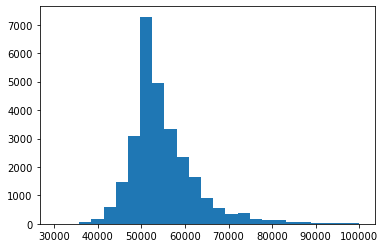

In [27]:
plt.hist(salary_df.INFLATION_SCALED_BASE_SALARY.values, bins=25)

In [28]:
overall_median_salary = np.median(salary_df.INFLATION_SCALED_BASE_SALARY)
overall_median_salary

52999.785469107555

### Get university median salary

In [29]:
def bootstrap_ci(x, ci=95, func = np.median, n_samples = 1000):
    vals = [func(np.random.choice(x, len(x), replace=True)) for i in range(n_samples)]
    bounds_0 = (100-ci)/2
    bounds_1 = 100 - bounds_0
    lower, upper = np.percentile(vals, (bounds_0, bounds_1))
    return lower, upper

In [30]:
median_salary = []
n_salaries = []
salary_upper = []
salary_lower = []
for idx, row in tqdm(university_df.iterrows(), total=len(university_df)):
    salary_values = salary_df[salary_df.INSTNM == row.INSTNM].INFLATION_SCALED_BASE_SALARY.values
    salary_bounds = bootstrap_ci(salary_values)
    salary_upper.append(salary_bounds[1])
    salary_lower.append(salary_bounds[0])
    med_sal = np.median(salary_values)
    if np.isnan(med_sal):
        median_salary.append(np.nan)
        n_salaries.append(0)
        if pd.isnull(row.institution)  == False:
            print("No postdoc data: {}".format( row.INSTNM))
        continue
    median_salary.append(med_sal)
    n_salaries.append(len(salary_values))
median_salary = np.array(median_salary)
n_salaries = np.array(n_salaries)

  0%|          | 0/6442 [00:00<?, ?it/s]

/home/AD/tsainbur/anaconda3/envs/postdoc/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/AD/tsainbur/anaconda3/envs/postdoc/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


No postdoc data: University of Wisconsin-Madison
No postdoc data: University of Virginia-Main Campus
No postdoc data: Dartmouth College
No postdoc data: Ohio State University-Main Campus
No postdoc data: University of Florida
No postdoc data: Michigan State University
No postdoc data: University of Colorado Denver/Anschutz Medical Campus
No postdoc data: University of Miami
No postdoc data: The University of Texas at Dallas
No postdoc data: Wake Forest University
No postdoc data: Yeshiva University
No postdoc data: University of New Mexico-Main Campus
No postdoc data: University of California-Riverside
No postdoc data: The University of Tennessee-Knoxville
No postdoc data: CUNY City College
No postdoc data: Rush University
No postdoc data: Boston College
No postdoc data: Wesleyan University
No postdoc data: Kansas State University
No postdoc data: William & Mary
No postdoc data: San Diego State University
No postdoc data: University of Central Florida
No postdoc data: Brigham Young Uni

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
salary_bounds

(nan, nan)

In [32]:
university_df["MEDIAN_SALARY"] = median_salary
university_df["N_SALARIES"] = n_salaries
university_df["MEDIAN_SALARY_UPPER"] = salary_upper
university_df["MEDIAN_SALARY_LOWER"] = salary_lower

In [33]:
# Median salary scaled to RPP
university_df["REAL_MEDIAN_SALARY"] = median_salary / (university_df["RPP_all"].values / 100)

In [34]:
university_df["REAL_MEDIAN_SALARY_UPPER"] = university_df["MEDIAN_SALARY_UPPER"] / (university_df["RPP_all"].values / 100)
university_df["REAL_MEDIAN_SALARY_LOWER"] = university_df["MEDIAN_SALARY_LOWER"] / (university_df["RPP_all"].values / 100)

In [35]:
median_salary_across_universities = np.nanmedian(median_salary)
median_salary_across_universities

51977.720978737605

In [36]:
university_df.to_pickle(DATA_DIR/ 'university_ranking_salary.pickle')

In [37]:
university_df[np.array(
    [
        True if 'virginia' in row.INSTNM.lower() else False for idx, row in university_df.iterrows()
    ]
)]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,RPP_goods,RPP_rents,RPP_other,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER
25,41.0,University of Virginia,USA,26.0,209.0,20.0,126.0,94.0,74.0,88.0,90.0,97.0,56.73,2015.0,234076,University of Virginia-Main Campus,University of Virginia UVa UVA,1827 University Avenue,Charlottesville,VA,22903-2628,51,5,James E. Ryan,President,4349240311,546001796,065391526,374500,1,https://www.virginia.edu/,https://admission.virginia.edu/,https://sfs.virginia.edu/,https://www.virginia.edu/apply,https://npc.collegeboard.org/student/app/virginia,https://sfs.virginia.edu/military,https://ias.virginia.edu/university-stats-fact...,https://studenthealth.virginia.edu/sdac,1,1,1,9,1,1,11,1,2,1,1,2,23,1,A,-2,-2,-2,1,1,1,1,1,2,15,11,14,14,5,16,15,15,15,2,5,2,-2,-2,16820,1,-2,-2,51003,Albemarle County,5105,-78.503428,38.035665,94,1,-78.503428,"Charlottesville, VA",98.8,96.4,112.8,95.1,NaN,0,NaN,NaN,NaN,NaN,NaN
98,256.0,Virginia Polytechnic Institute and State Unive...,USA,98.0,283.0,152.0,218.0,201.0,264.0,234.0,285.0,181.0,46.46,2015.0,233921,Virginia Polytechnic Institute and State Unive...,Virginia Tech,"210 Burruss Hall, 800 Drillfield Dr.",Blacksburg,VA,24061-0131,51,5,Timothy D. Sands,President,5402316994,546001805,003137015,375400,1,www.vt.edu/,vt.edu/admissions/undergraduate.html,www.finaid.vt.edu/,vt.edu/apply.html,tcc.ruffalonl.com/Virginia Polytechnic Institu...,veterans.vt.edu/students/benefits.html,https://aie.vt.edu/strategic-analysis/public-d...,www.ssd.vt.edu/index.html,1,1,1,9,1,1,11,1,2,2,1,2,13,1,A,-2,-2,-2,1,1,1,1,1,2,15,17,14,14,4,16,15,15,15,1,5,2,-2,-2,13980,1,-2,-2,51121,Montgomery County,5109,-80.423675,37.229012,93,1,-80.423675,"Blacksburg-Christiansburg, VA",90.2,92.5,80.1,95.0,51252.766728,108,52983.341975,50367.297514,56821.249145,58739.846979,55839.575957
100,259.0,Virginia Commonwealth University,USA,100.0,367.0,403.0,150.0,264.0,253.0,321.0,213.0,206.0,46.43,2015.0,234030,Virginia Commonwealth University,VCU,910 W Franklin St,Richmond,VA,23284-2512,51,5,Dr. Michael Rao,President,8048280100,546001758,105300446,373500,1,https://www.vcu.edu/,https://www.vcu.edu/admissions/,https://www.finaid.vcu.edu/,https://www.vcu.edu/admissions/apply,https://npc.collegeboard.org/student/app/vcu,https://www.militaryservices.vcu.edu/benefits/...,https://www.vcuathletics.com/landing/index,https://saeo.vcu.edu/,1,1,1,9,1,1,11,1,2,1,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,14,14,13,4,15,15,15,15,2,5,2,-2,-2,40060,1,-2,-2,51760,Richmond City,5104,-77.452697,37.549620,94,1,-77.452697,"Richmond, VA",95.8,96.5,95.8,95.1,51962.652412,52,51964.730835,50997.868082,54240.764522,54242.934066,53233.682758
145,441.0,West Virginia University,USA,145.0,328.0,178.0,218.0,441.0,409.0,428.0,437.0,617.0,45.02,2015.0,238032,West Virginia University,,PO Box 6201,Morgantown,WV,26506,54,5,E. Gordon Gee,President,3042930111,556000793,929332658,382700,1,www.wvu.edu/,admissions.wvu.edu/,financialaid.wvu.edu/,https://admissions.wvu.edu/how-to-apply,financialaid.wvu.edu/net-price-calculator,wvuveterans.wvu.edu/,,accessibilityservices.wvu.edu/,1,1,1,9,1,1,11,1,2,2,1,2,13,1,A,-2,-2,-2,1,1,1,1,1,2,15,17,14,12,4,15,15,16,15,1,5,1,West Virginia Higher Ed